## Description

This is testing to see if we get the same (or similar) results to CNN_6_1 using CNN_5_0 data: Combined/LaFleur_supp.csv. It DOES use the absolute Observed log(TX/Txref), unlike CNN_6_1_1.

In [1]:
from CNN_6_1_2 import *

2025-04-11 14:28:44.888972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Documentation variables
name = 'CNN_6_1_2'
model_path = f'../Models/{name}.keras'
data_path = '../Data/Combined/LaFleur_supp.csv'
search_dir = '../Testing CNN/Hyperparameter Search'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

In [3]:
X, y = load_features(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform Bayesian Optimization
best_model, best_hyperparams = train_best_model(name, search_dir, X_train, y_train, X_test, y_test,
                                X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# Save the best model
best_model.save(model_path)

Reloading Tuner from ../Testing CNN/Hyperparameter Search\CNN_6_1_2_bayesian_search\tuner0.json



c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
for key, value in best_hyperparams.values.items():
    print(f"{key}: {value}")

num_layers: 3
filters_0: 64
kernel_size_0: 3
strides_0: 1
pool_size_0: 2
activation_0: tanh
dense_units: 64
learning_rate: 0.0016993429801653187
filters_1: 32
kernel_size_1: 5
strides_1: 1
pool_size_1: 3
activation_1: relu
filters_2: 128
kernel_size_2: 5
strides_2: 2
pool_size_2: 3
activation_2: relu


In [4]:
# Load, predict, and evaluate the best model
y_pred = load_and_predict(model_path, X_test)
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  0.002255467866978246
RMSE:  0.04749176630720578
MAE:  0.030994589560400916
R2:  0.8804957260078363


In [5]:
print(min(y_pred['Value']), max(y_pred['Value']))

0.03907759487628937 0.7963981032371521


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


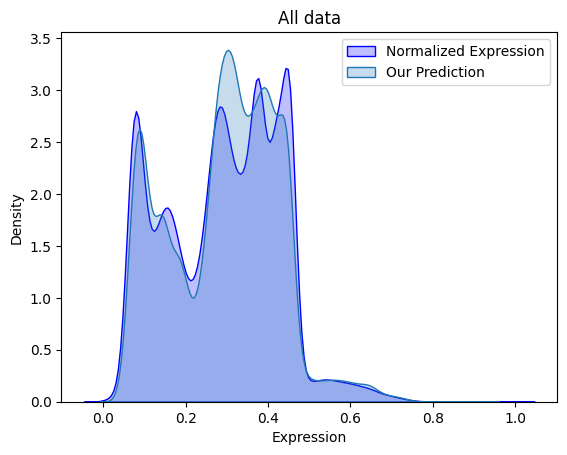

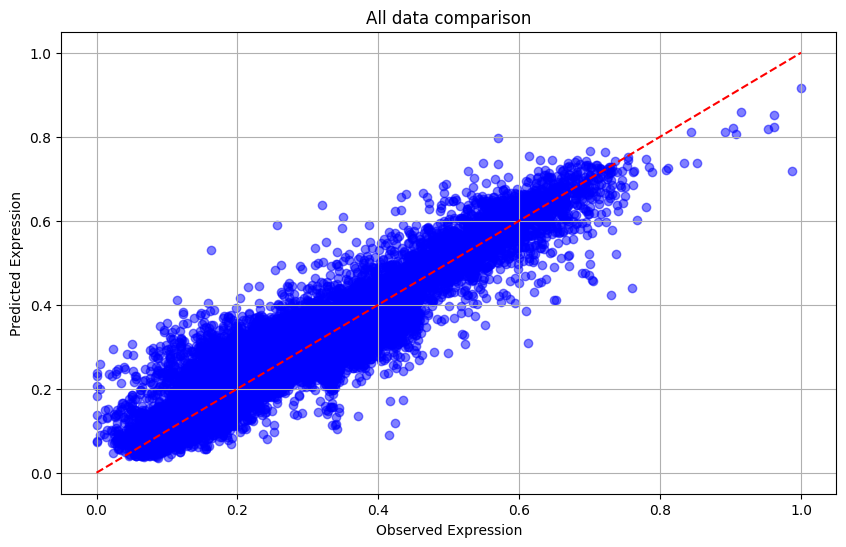

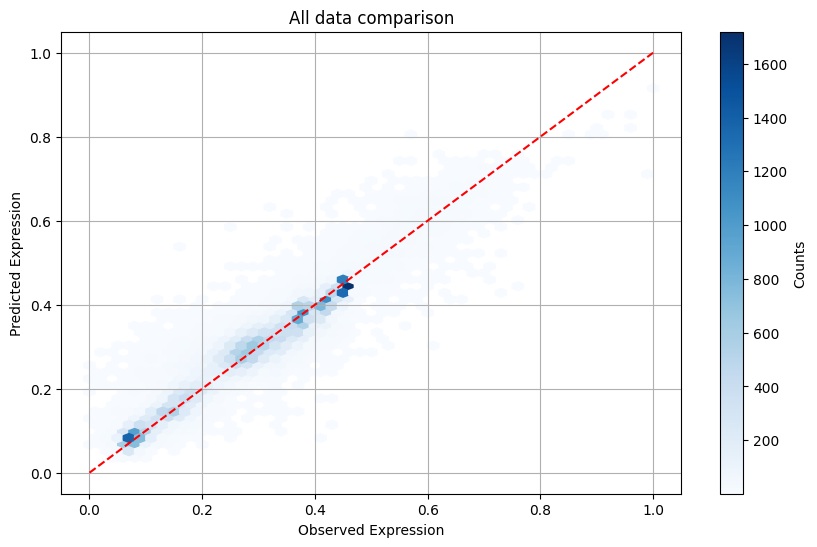

In [6]:
df = pd.read_csv(data_path)
df['Normalized Expression'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

predicted = load_and_predict(model_path, X)
observed = df['Normalized Expression'].values

plot_kde(df, predicted, "All data")
plot_scatter(observed, np.ravel(predicted), "All data comparison")
plot_hexbin(observed, np.ravel(predicted), "All data comparison")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


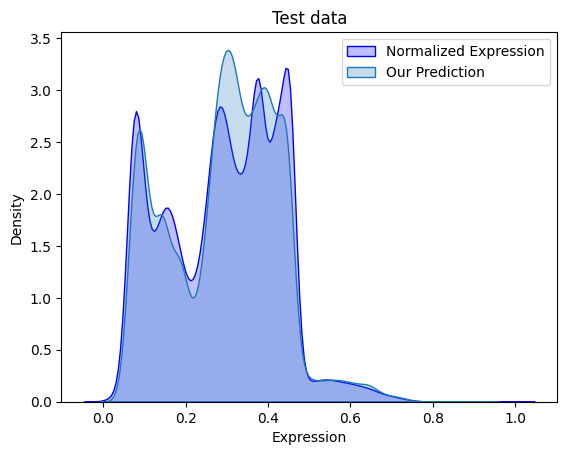

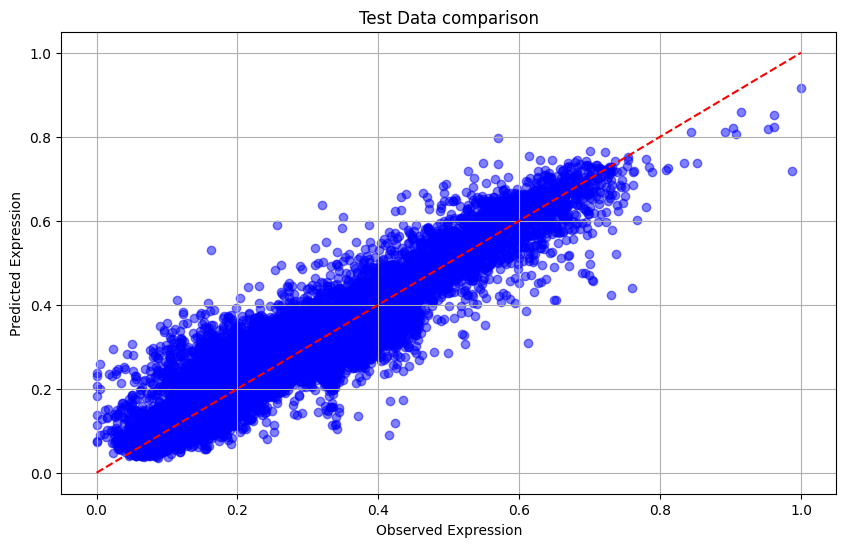

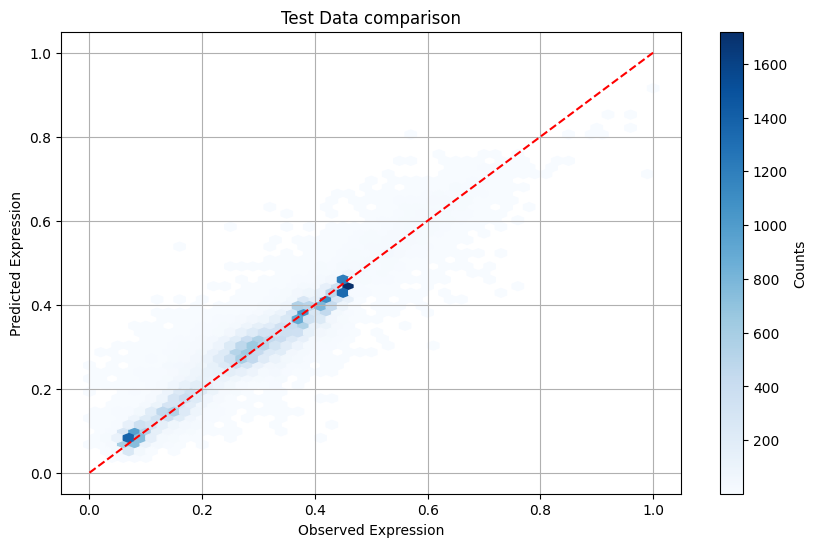

In [7]:
df = pd.read_csv(data_path)
df['Normalized Expression'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

predicted = load_and_predict(model_path, X)
observed = df['Normalized Expression'].values

plot_kde(df, predicted, "Test data")
plot_scatter(observed, np.ravel(predicted), "Test Data comparison")
plot_hexbin(observed, np.ravel(predicted), "Test Data comparison")

In [10]:
model = load_model(model_path)
model.summary()

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 148, 64)        │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 70, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,045 (668.15 KB)

 Trainable params: 56,865 (222.13 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 113,732 (444.27 KB)

In [11]:
model.save(model_path.replace('.keras', '.hdf5'))